## Module 4 Practice - Heatmaps



This practice notebook has exercises for plotting **heatmaps** using R and ggplot library.


There are different types of heatmaps used in different disciplines; each referred to by the term “heatmap”, even though they use slightly different visualization techniques.

 - **Clustered heatmaps**: these heatmaps have a tiled arrangement of variables, and by reordering the rows and columns, they can visualize clusters in the data. Microarray or gene expression heatmaps are clustered heatmaps. 
 
 - **Spatial heatmaps**: these heatmaps represent densities of two variables; the x and y axes show discrete or continuous values of these two variables as a fixed, ordered grid. Shades of colors represent densities. 
 

## Cluster Heatmaps 

R has a base `heatmap()` function that can be used for clustered heatmaps. The following is an example of clustering data in mtcars data set: 


 

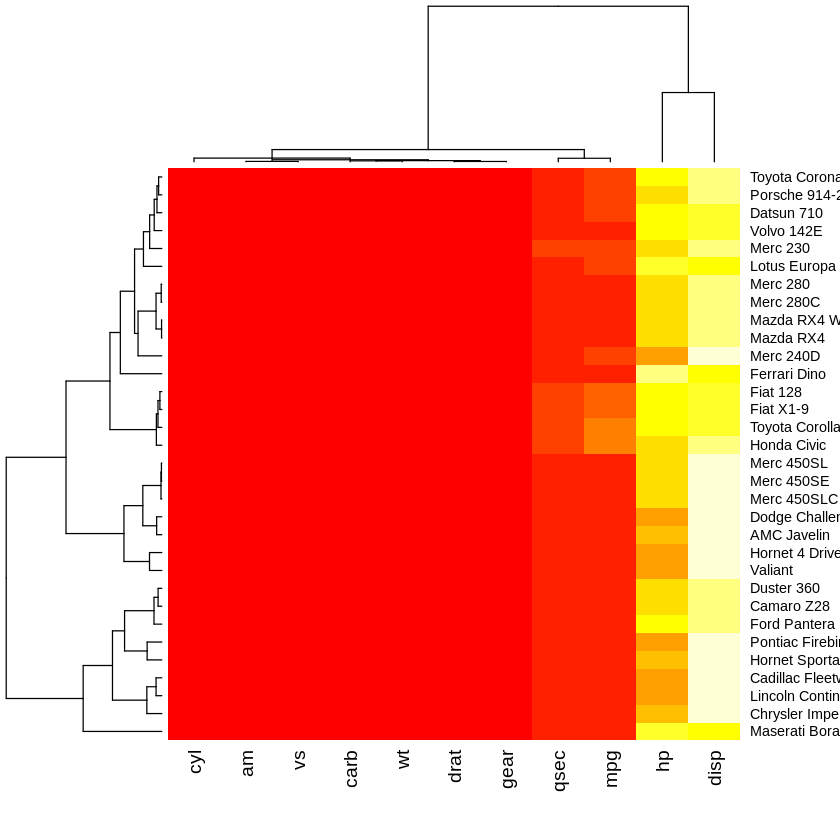

In [1]:
data <- as.matrix(mtcars) 
heatmap(data)


**Because the data is not normalized**, we don't see a pattern. We can either normalize the data by scale() function, or let the heatmap function do it: 


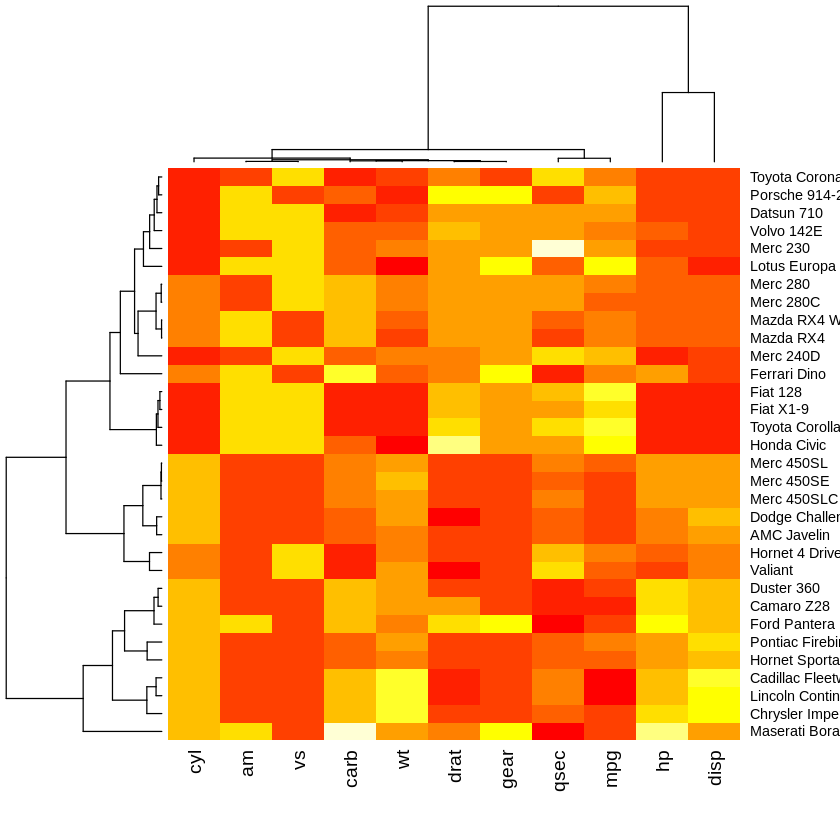

In [2]:
heatmap(data, scale="column") #

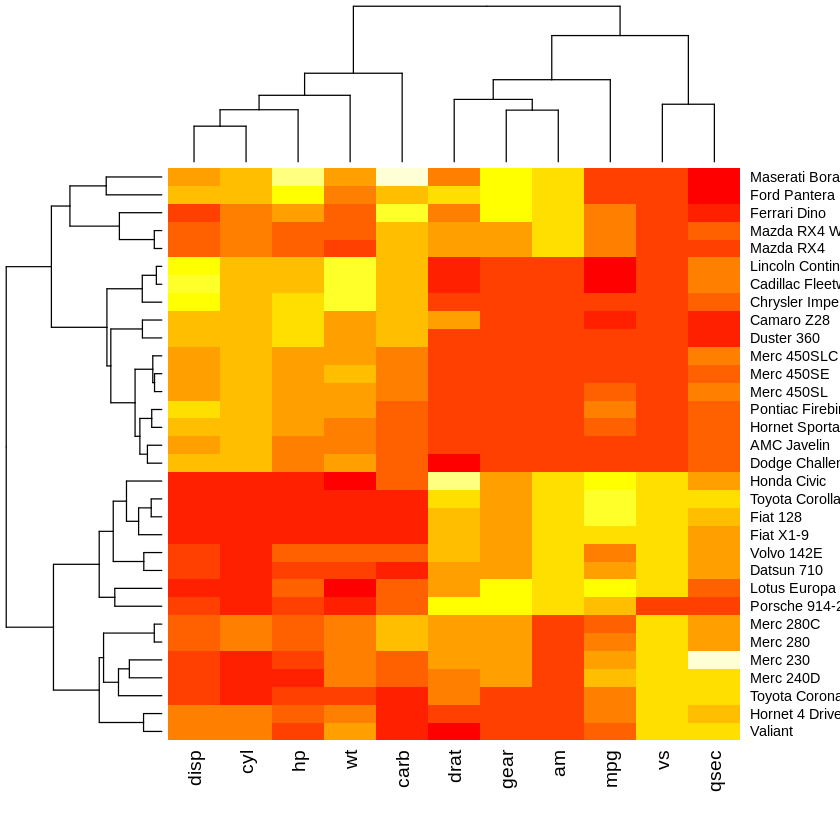

In [3]:
# or like this: 
sdata <- scale(mtcars)
heatmap(sdata, scale="none")

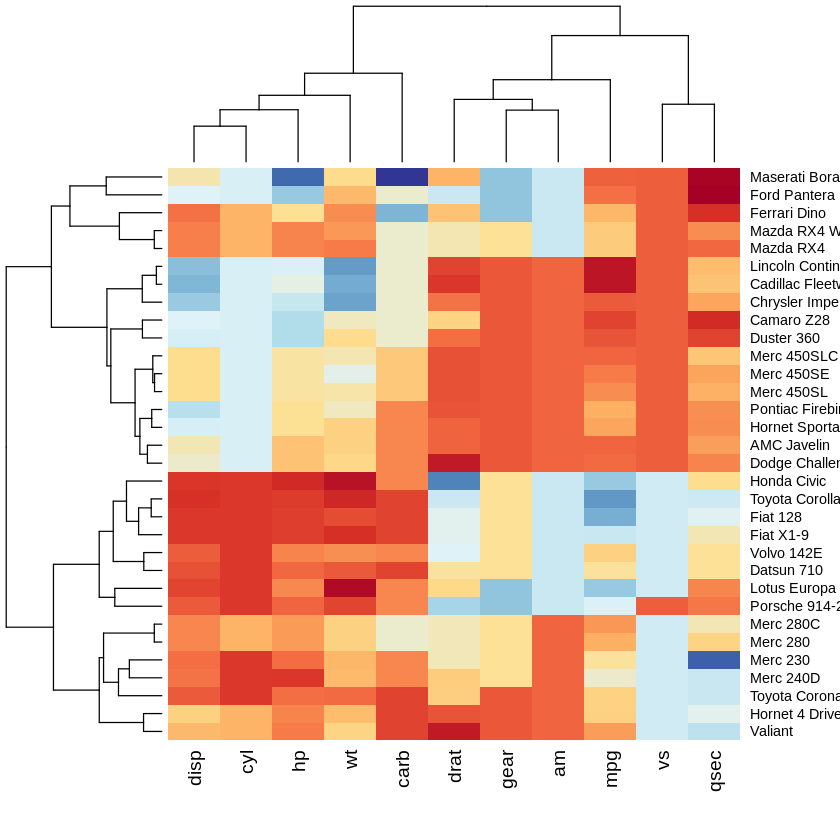

In [4]:
# we can also change the palette 
library("RColorBrewer")
colp <- colorRampPalette(brewer.pal(10, "RdYlBu"))(300)
heatmap(sdata, scale="none", col=colp)

Here is a [link to the `heatmap()` documentation.](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/heatmap) For more reading on heatmaps, and diving deep for heatmaps in bioinformatics, you can follow these links:

 - [The history of the cluster heatmap](https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.7924)
  
 - [Making heatmaps in R](http://compbio.ucsd.edu/making-heat-maps-r/)  
 
 ---

The following is another example of a heatmap that visualizes a matrix of numbers, in this case, NBA statistics. 

In [5]:
library(RColorBrewer)
nba <- read.csv("/dsa/data/all_datasets/ppg2008.csv", sep=",")
head(nba)

Name           G  MIN  PTS  FGM  FGA  FGP   FTM FTA FTP   ⋯ X3PA X3PP  ORB
1 Dwyane Wade    79 38.6 30.2 10.8 22.0 0.491 7.5 9.8 0.765 ⋯ 3.5  0.317 1.1
2 LeBron James   81 37.7 28.4  9.7 19.9 0.489 7.3 9.4 0.780 ⋯ 4.7  0.344 1.3
3 Kobe Bryant    82 36.2 26.8  9.8 20.9 0.467 5.9 6.9 0.856 ⋯ 4.1  0.351 1.1
4 Dirk Nowitzki  81 37.7 25.9  9.6 20.0 0.479 6.0 6.7 0.890 ⋯ 2.1  0.359 1.1
5 Danny Granger  67 36.2 25.8  8.5 19.1 0.447 6.0 6.9 0.878 ⋯ 6.7  0.404 0.7
6 Kevin Durant   74 39.0 25.3  8.9 18.8 0.476 6.1 7.1 0.863 ⋯ 3.1  0.422 1.0
  DRB TRB AST STL BLK TO  PF 
1 3.9 5.0 7.5 2.2 1.3 3.4 2.3
2 6.3 7.6 7.2 1.7 1.1 3.0 1.7
3 4.1 5.2 4.9 1.5 0.5 2.6 2.3
4 7.3 8.4 2.4 0.8 0.8 1.9 2.2
5 4.4 5.1 2.7 1.0 1.4 2.5 3.1
6 5.5 6.5 2.8 1.3 0.7 3.0 1.8

In [6]:
# Let's sort, add names, and display the statistics as a matrix heatmap. 
nba <- nba[order(nba$PTS),]
row.names(nba) <- nba$Name
nba_data <- as.matrix(nba[,2:20])


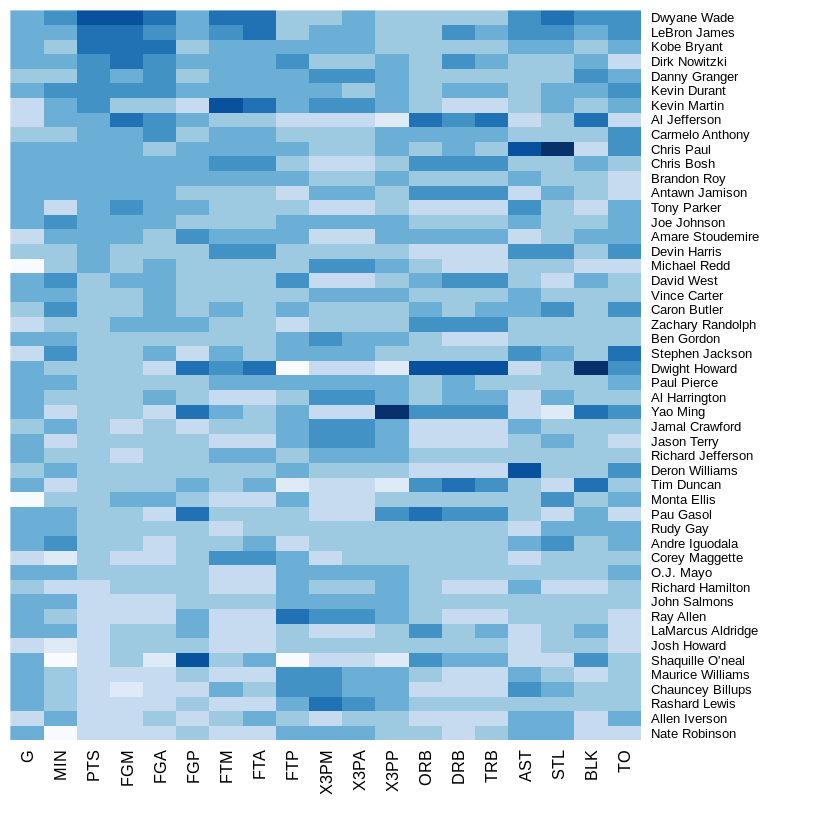

In [7]:
#nba_matrix <- data.matrix(nba)
heatmap(nba_data, Rowv=NA, Colv=NA, col=brewer.pal(9, "Blues"), scale="column", margins=c(5,10))

**We can also use ggplot to create heatmaps with `geom_tile()`**

In [8]:
library(ggplot2)
library(reshape2)
library(plyr)
library(scales)

# base heatmap() function requires a matrix, but ggplot works with a data frame, 
# so we will convert the data from wide format to long format
lnba <- melt(nba)
lnba <- ddply(lnba, .(variable), transform, rescale=rescale(value)) # we also do the normalization here 

# compare lnba and nba to see what we have done. 

Using Name as id variables


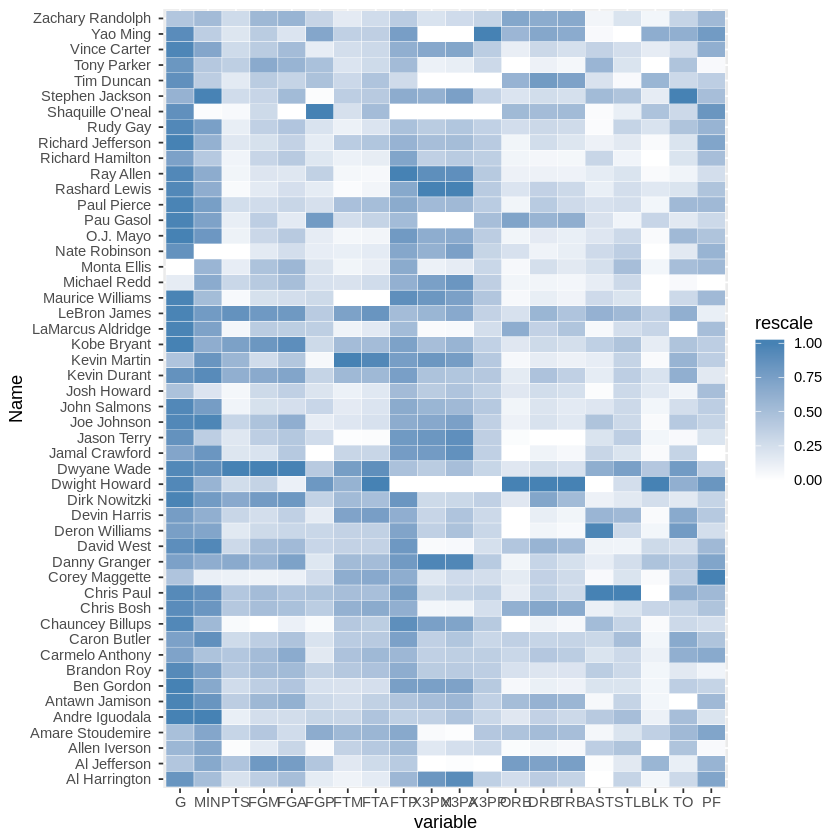

In [9]:
p <- ggplot(lnba, aes(variable, Name)) +  # each attribute column in the original data became rows of observation

     geom_tile(aes(fill = rescale), color = "white") + 
     
     scale_fill_gradient(low = "white",high = "steelblue") 

p



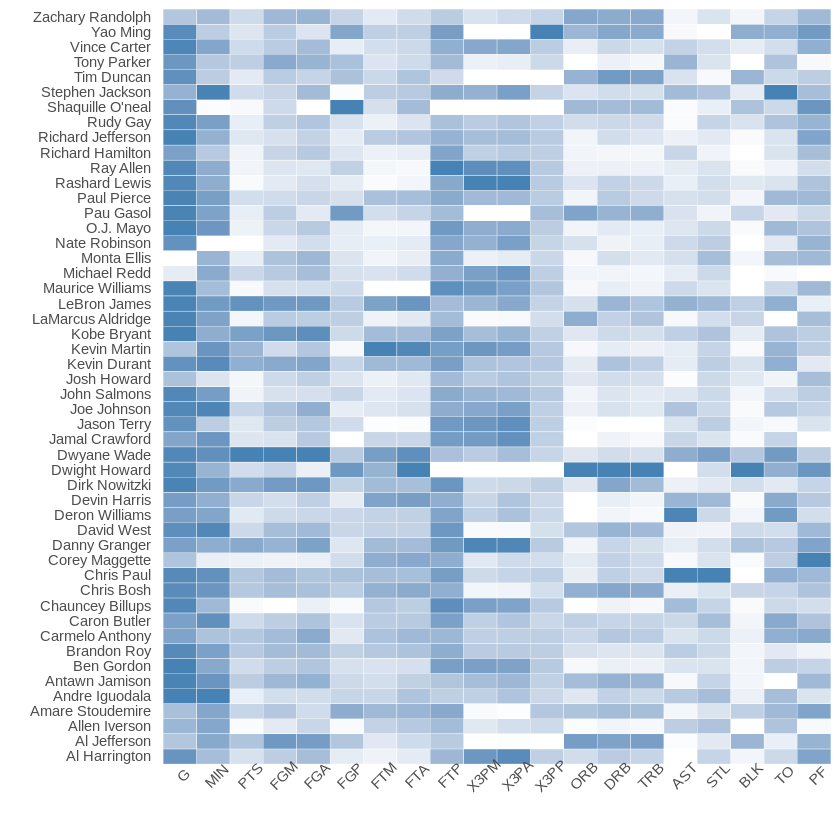

In [10]:
# Let's tweak with it to make it look better: 
p +   labs(x="", y="") + 
      scale_x_discrete(expand = c(0, 0)) +
      scale_y_discrete(expand = c(0, 0)) + 
      theme(legend.position="none", axis.text.x = element_text(angle = 45), axis.ticks = element_blank())

## YOUR TURN

**Create a heatmap of the mtcars data using ggplot.** Here is how it starts: 

In [ ]:
head(mtcars)
lcars <- melt(mtcars)
lcars$car <- rep(row.names(mtcars), 11)

# compare mtcars to lcars to see what we have done. 


In [ ]:


ggplot(<YOUR CODE>) +

geom_tile(aes(<YOUR CODE>), colour = "white") +

scale_fill_gradient(low = "white", high = "red")



**We have to scale the variables for better visualization:**

In [ ]:
#rescale values for all variables in melted data frame
lcars <- ddply(lcars, .(variable), transform, rescale = rescale(value))

#create heatmap using rescaled values

ggplot(<YOUR CODE>) +

geom_tile(<YOUR CODE>) +

labs(x="", y="") + 

scale_fill_gradientn(colors=brewer.pal(10,"RdYlBu")) + # create a continuous palette from discrete brewer palette 

scale_x_discrete(expand = c(0, 0)) +

scale_y_discrete(expand = c(0, 0)) + 

theme(legend.position="none", axis.ticks = element_blank())

**What's the difference between this heatmap and the baseline `heatmap()` function?**

---


Let's load the familiar Kings county data for house prices. We will plot a heatmap to show **the distribution of houses between floors and the year** in which the house is built. The sequential color of tiles will represent number of houses built (white: fewer numbers, blue: larger numbers).

In [17]:
kc_house_data = read.csv("/dsa/data/all_datasets/house_sales_in_king_county/kc_house_data.csv")

Below, we compute the distribution of every combination of houses for yr_built and floors. **`yr_built_floors`** dataframe has yr_built, floors, and Freq that represents the number of houses for that combination of year and floors. 

In [18]:
yr_built_floors = as.data.frame(table(kc_house_data$yr_built, kc_house_data$floors))

In [19]:
str(yr_built_floors)

'data.frame':	696 obs. of  3 variables:
 $ Var1: Factor w/ 116 levels "1900","1901",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2: Factor w/ 6 levels "1","1.5","2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq: int  26 8 5 12 22 20 32 17 37 34 ...


## YOUR TURN

**Complete the following code to visualize the house numbers.**

In [ ]:
ggplot(<YOUR CODE>) + 

geom_tile(<YOUR CODE>) +   

scale_fill_gradient(name="count",low="white",high="blue") + 

scale_y_discrete(breaks=c(seq(1900, 2020, by=10))) +

scale_x_discrete(labels=levels(yr_built_floors$Var2)) +

xlab("Floors") + 

ylab("Built Year") + 

labs(title="Houses built from 1900 to 2015")

**It seems like single floor houses were popular from 50's to 80's, double floor houses are more popular now. Can you make this plot look better?**

**This plot is actually a 2D histogram** where frequencies are represented by color instead of bar size. ggplot has a way of doing 2D histograms, as we will see below. 

---

## Spatial Heatmaps and Density Plots 

Let's start with the diamonds data set and plot a scatterplot with transparency to mitigate the crowded data points in the plot. This is a simple density plot as the transparency help us to perceive the density of points. 

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


carat cut       color clarity depth table price x    y    z   
1 0.23  Ideal     E     SI2     61.5  55    326   3.95 3.98 2.43
2 0.21  Premium   E     SI1     59.8  61    326   3.89 3.84 2.31
3 0.23  Good      E     VS1     56.9  65    327   4.05 4.07 2.31
4 0.29  Premium   I     VS2     62.4  58    334   4.20 4.23 2.63
5 0.31  Good      J     SI2     63.3  58    335   4.34 4.35 2.75
6 0.24  Very Good J     VVS2    62.8  57    336   3.94 3.96 2.48

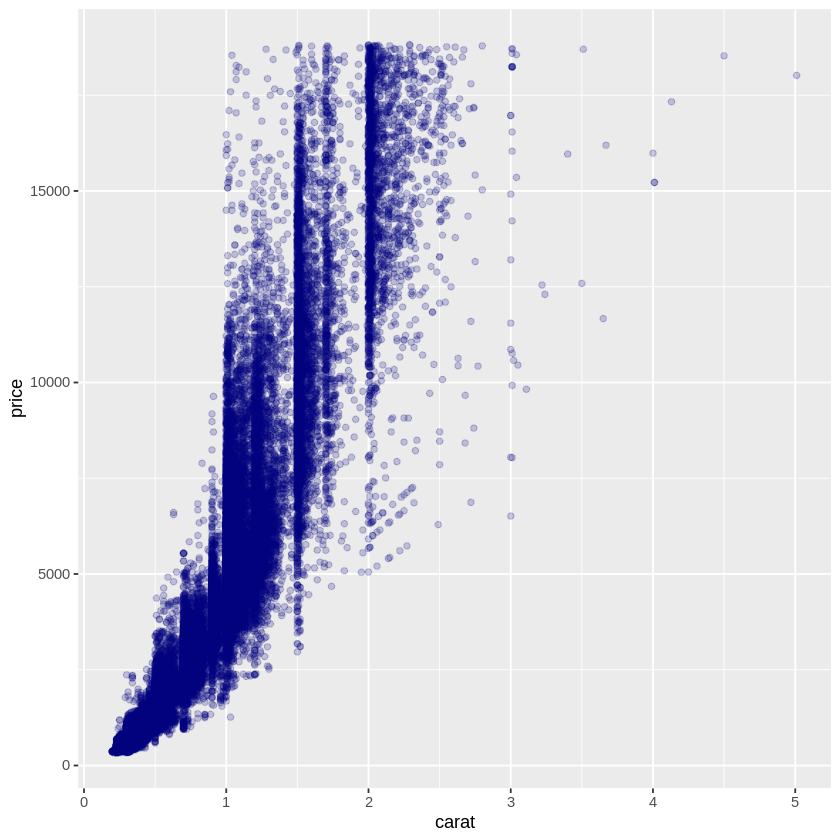

In [11]:
library(ggplot2)
data(diamonds)
str(diamonds)
head(diamonds)
d <- ggplot(diamonds, aes(carat, price)) + geom_point(alpha=0.2, color="navy")
d

**It does not do a good job in visualizing the density of the points.** We can create a **2D histogram** to show the count of points. 

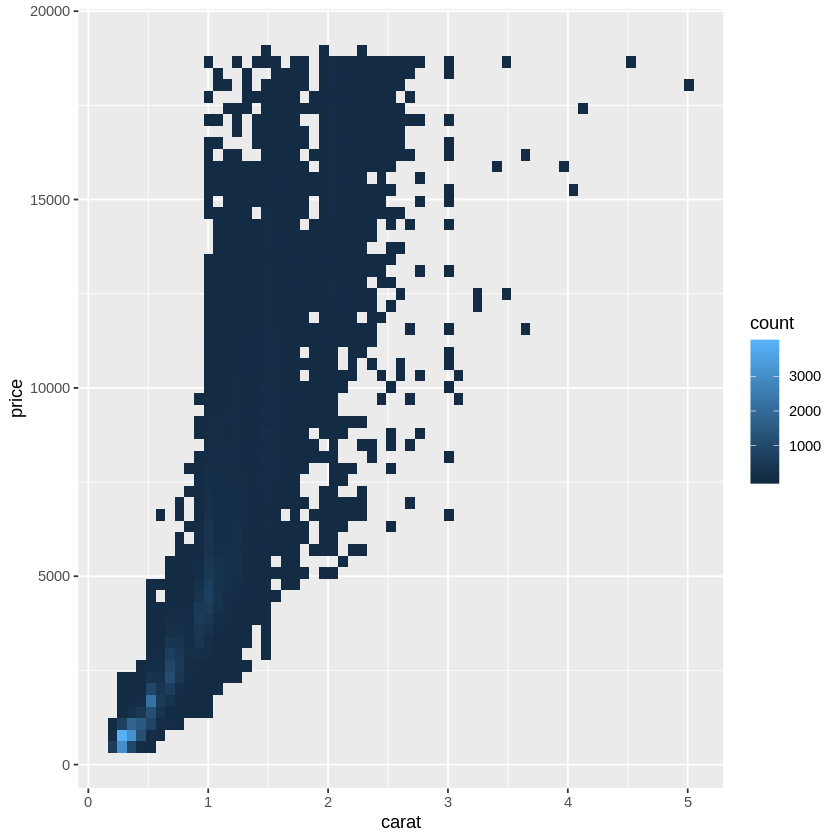

In [12]:
# heatmap
d <- ggplot(diamonds, aes(carat, price)) + geom_bin2d(bins=60)
d 

**This is better, but using log scale for color palette would better show the density variations, so let's do that.**

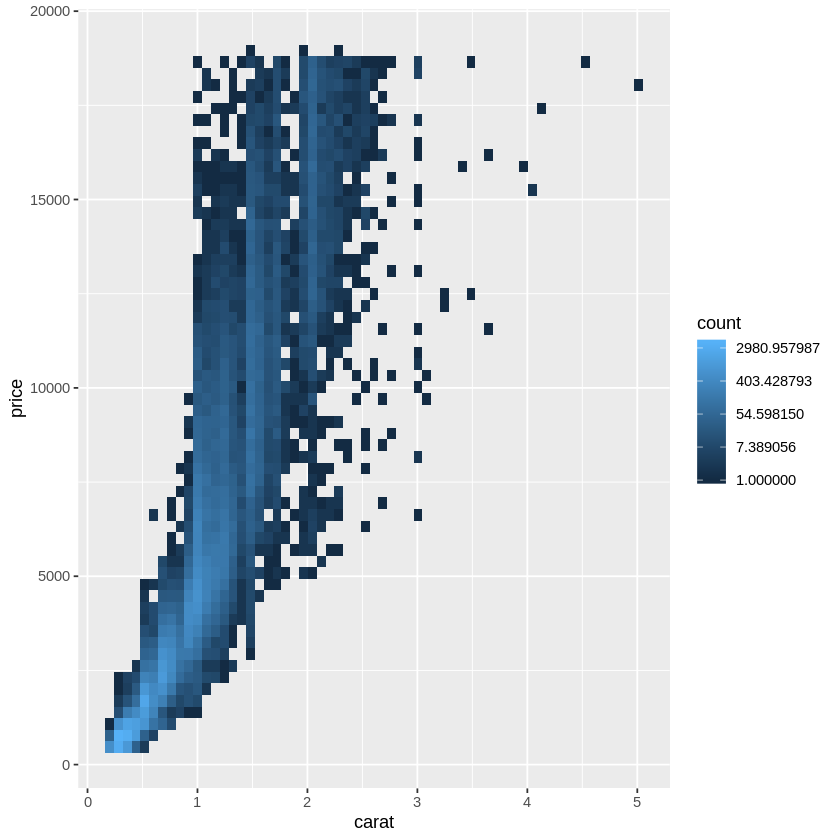

In [13]:
d + scale_fill_gradient(trans="log")

**We can also create a 2D density plot like this:** 

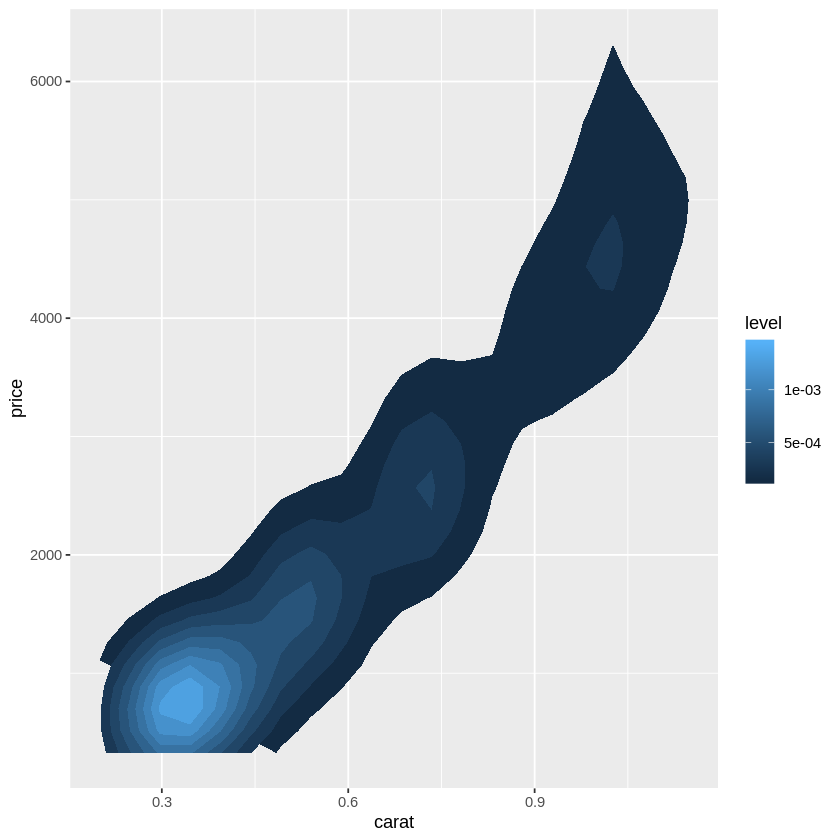

In [14]:
# Or we can 2D density estimate to the plot
 ggplot(diamonds, aes(carat, price)) + stat_density_2d(aes(fill = ..level..), geom="polygon", bins=10)
 

---

### Heatmaps on Geospatial Maps

Heatmaps are frequently used with **geospatial maps**. Let's generate the map for **Seattle** and overlay a density heatmap on it. 

get_map() in **`ggmap`** library will fetch you the geospatial map of a supplied location. It queries Google Maps, OpenStreetMap, Stamen Maps, or Naver Map servers for a map. The location can be an address, longitude/latitude pair (in that order), or left/bottom/right/top bounding box. For it to work with the default Google maps, a **Google Maps api key** needs to be supplied to Google. For this course, we will use DSA's api key as shown in the following example. You can also get your own api keys that come with some credit to allow you to use them for free up to a limit of monthly map queries. 

**Reference:**


- [ggmap](https://www.rdocumentation.org/packages/ggmap/versions/2.6.1/topics/ggmap)
- [get_map()](https://www.rdocumentation.org/packages/ggmap/versions/2.6.1/topics/get_map)

In [20]:
library(ggmap)
# let's read the api key from file and register it so that the subsequent calls to get_map() will work. 
# This has to be run at least once before any calls to get_map() can be placed. 
apikey <- scan("/dsa/data/all_datasets/ggmap_api_key.txt", what="character")
register_google(key = apikey)

Source : https://maps.googleapis.com/maps/api/staticmap?center=Seattle&zoom=11&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Seattle&key=xxx
Warning message:
“Removed 9373 rows containing missing values (geom_point).”

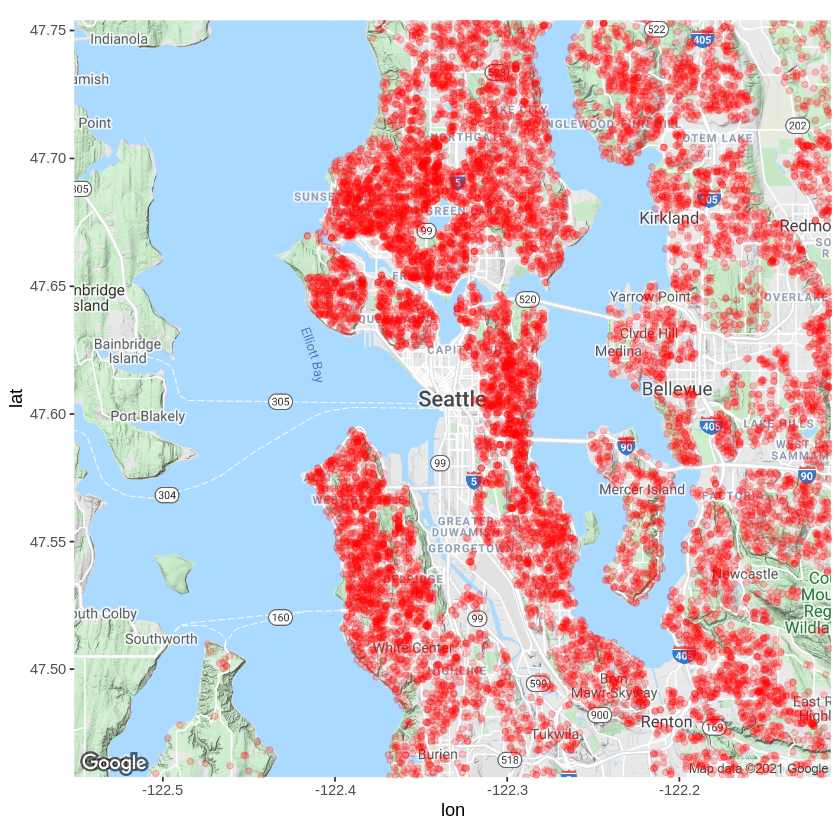

In [21]:
# get the map 
kc_map_outline <- get_map(location='Seattle', zoom=11)

# create the map layer 
kc_map <- ggmap(kc_map_outline)

# put a point layer on top 
kc_map <- kc_map + geom_point(data=kc_house_data, aes(x=long, y=lat), inherit.aes=FALSE, color='red', alpha=0.2)
kc_map

**`geom_density2d`** in below code will draw the 2d contours based on the density of data points. The number of contours around a region is proportional to density of points. **`stat_density2d`** will show the heatmap based on number of data points. The map is shaded red if the number of data points are more in the region and yellow otherwise. 

**Rerefence:**

- [geom_density2d](https://www.rdocumentation.org/packages/ggplot2/versions/1.0.1/topics/geom_density2d)
- [stat_density2d](https://www.rdocumentation.org/packages/ggplot2/versions/1.0.1/topics/stat_density2d)

Warning message:
“Removed 9373 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 9373 rows containing non-finite values (stat_density2d).”

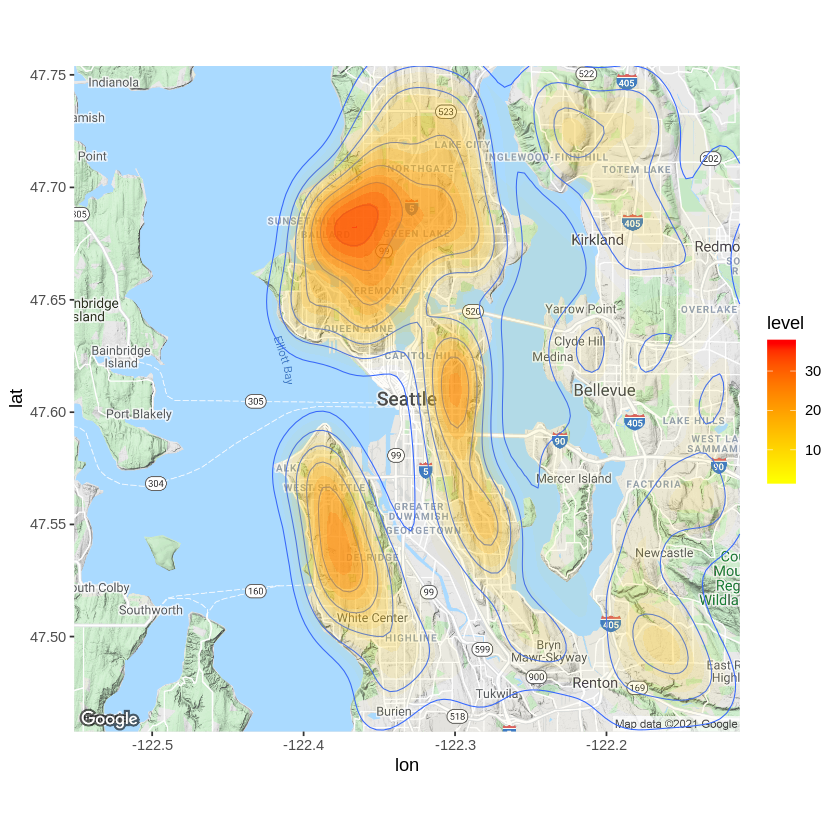

In [22]:
ggmap(kc_map_outline) + 
geom_density2d(data = kc_house_data, aes(x = long, y = lat), size = 0.3) + 
stat_density2d(data = kc_house_data, aes(x = long, y = lat, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 
scale_fill_gradient(low = "yellow", high = "red") + 
scale_alpha(range = c(0, 0.3), guide = FALSE)

Below plot is a scatter plot where size of the data point indicates the price of the house. By using transparency, we can efficiently visualize superposed data points and approximate to a heatmap.

Warning message:
“Removed 9373 rows containing missing values (geom_point).”

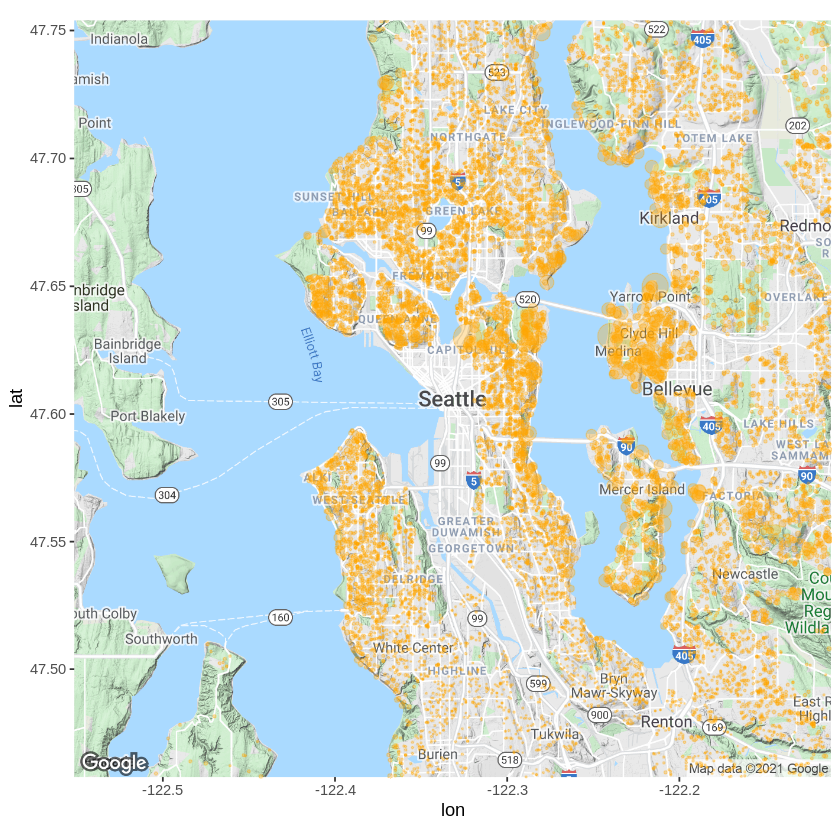

In [23]:
circle_scale_amt = 0.000001
ggmap(kc_map_outline) + 
    geom_point(data=kc_house_data, aes(x=long, y=lat),col="orange",alpha=0.3, size=kc_house_data$price*circle_scale_amt) + 
    scale_size_continuous(range=range(kc_house_data$price))